In [4]:
import pandas as pd
import seaborn as sns
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #lybrary used to an analysis of Principal Components
from sklearn.preprocessing import normalize 
from sklearn import preprocessing

In [2]:
import ast

vectors_list = []
with open('C:\\Users\\Admin\\Downloads\\wine.data') as file:
    for line in file:
        l = line.strip('\n')
        x = ast.literal_eval(l)
        vectors_list.append(list(x))

__Normalization and Standardization:__ <br> We know that k-means works with euclidean distance of point and custers's centres. So basically we can imagine k-means working on rounds. <br> If we use datas as they are, especially if we don't know nothing of them, we risk to give too much weight on elements that has a small variance, and this can false the right working of custering

In [5]:
n = normalize(vectors_list, axis=1) #we do this to have a better response by our data to custering 
s = preprocessing.scale(n)
v_list = []
for el in list(s):          #in this way we convert the array uotput in a nested list
    v_list.append(list(el))

Now we want to have just a view of our dataset, and for this puorpose we use PCA analysis, reducing dataset to N=2 and N=3, even if we are going to work later using k-means on a N=14 dimension dataset

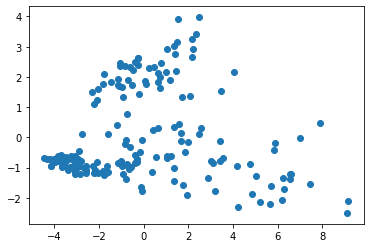

In [6]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(v_list)
t = reduced.transpose()

plt.scatter(t[0], t[1])
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


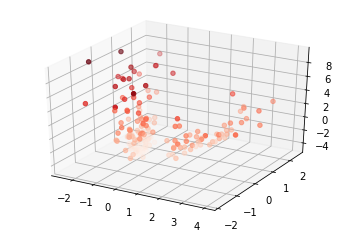

In [7]:
from mpl_toolkits import mplot3d
pca = PCA(n_components=3)
reduced = pca.fit_transform(v_list)
fig = plt.figure()
t = reduced.transpose()

plt.scatter(t[0], t[1])
ax = plt.axes(projection='3d')

zdata = t[0]
xdata = t[1]
ydata = t[2]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds')

In [12]:
def eu_dist(v1,v2):
    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(v1, v2)])) #calculating for each component
    return distance 

In [9]:
def totalcosts(res):
    Tot_sum = 0
    for i in range(len(res[0])):
        for el in range(len(res[0][i])):
            Tot_sum += eu_dist(res[0][i][el],res[1][i]) #in res[1][i] we find final centres
    return Tot_sum #sum of the distances of all points and their centres

def squareddist(res):
    Tot_sum = 0
    for i in range(len(res[0])):
        for el in range(len(res[0][i])):
            Tot_sum += (eu_dist(res[0][i][el],res[1][i]))**2 
    return Tot_sum 
 

In [10]:
def clustering(k,clusters,vectors_list):
    count = 0                 #var to count in how many steps the algorithm reach the solution

    Final_clusters = []       #it will be a nested list, each sublist is a cluste
    final_mean = []           #here we store last values of centres

    l = []                       # ex : l=[mean1,mean2], used in while cycle to assign points to clusters 
    for i in range(k):
        l.append(clusters[i])

    mean_list = [l]

    var = True
    while var :

        c_dict = {}        #this dict is use to store temporary clusters of the i-th iteration
        for n in range(k):
            c_dict[n]=[]   #each key is a cluster, then we'll fill each one with its closest points

        for i in vectors_list:
            l_temp = []
            for j in range(len(l)):
                l_temp.append(eu_dist(i,l[j])) #store the distance between the sublists and all centres 

            minimum = min(l_temp)       #find the closest array for this sublist list
            ind = l_temp.index(minimum) #find in which cluster it shoul be

            c_dict[ind].append(i)  #each key of the dict is a number from 0 to k-1, so we store each sublist in the right cluster

        l_temp = []
        for n in range(k):
            arr = np.array(c_dict[n]) #c1_ = np.array(c[0])
            mean = list(np.mean(arr, axis = 0, dtype=np.float64)) #mean vector for each
            l_temp.append(mean)

        mean_list.append(l_temp)

        l = l_temp

        #print(mean_list[-2])
        #print(mean_list[-1])
        if mean_list[-2] == mean_list[-1]: #if the last mean is equeal to the previus last one, the mean is not chenging anymore,
                                           # so clusters are not changing continuing to iterate. We stop the algorithm
            for i in range(k):
                Final_clusters.append(c_dict[i]) #we take last clusters we build
            final_mean = mean_list[-1]           #we have memory of the last centres
            var = False
        count += 1
    print('Done In ',count,' steps')
    return [Final_clusters, final_mean]

In [32]:
cost_list = []

################################## K = 1 #################################################

Clusters1 = random.choices(v_list, k = 1) #cluster has to be assigned outside of function, because of worrking of random.choise
res1 = clustering(1,Clusters1,v_list)
totcosts1 = totalcosts(res1)
cost_list.append(totcosts1)

################################## K = 2 #################################################

Clusters2 = random.choices(v_list, k = 2) 
res2 = clustering(2,Clusters2,v_list)
totcosts2 = totalcosts(res2)
cost_list.append(totcosts2)

################################## K = 3 #################################################

Clusters3 = random.choices(v_list, k = 3) 
res3 = clustering(3, Clusters3,v_list)
totcosts3 = totalcosts(res3)
cost_list.append(totcosts3)

################################## K = 4 ################################################

Clusters4 = random.choices(v_list, k = 4) 
res4 = clustering(4, Clusters4,v_list)
totcosts4 = totalcosts(res4)
cost_list.append(totcosts4)

################################## K = 5 ################################################

Clusters5 = random.choices(v_list, k = 5) 
res5 = clustering(5, Clusters5,v_list)
totcosts5 = totalcosts(res5)
cost_list.append(totcosts5)

################################## K = 6 ################################################

Clusters6 = random.choices(v_list, k = 6) 
res6 = clustering(6, Clusters6,v_list)
totcosts6 = totalcosts(res6)
cost_list.append(totcosts6)

################################## K = 7 ################################################

Clusters7 = random.choices(v_list, k = 7) 
res7 = clustering(7, Clusters7,v_list)
totcosts7 = totalcosts(res7)
cost_list.append(totcosts7)

################################## K = 8 ################################################

Clusters8 = random.choices(v_list, k = 8) 
res8 = clustering(8, Clusters8,v_list)
totcosts8 = totalcosts(res8)
cost_list.append(totcosts8)

################################## K = 9 ################################################

Clusters9 = random.choices(v_list, k = 9)
res9 = clustering(9, Clusters9,v_list)
totcosts9 = totalcosts(res9)
cost_list.append(totcosts9)

################################## K = 10 ################################################

Clusters10 = random.choices(v_list, k = 10) 
res10 = clustering(10, Clusters10,v_list)
totcosts10 = totalcosts(res10)
cost_list.append(totcosts10)

################################## K = 11 ################################################

Clusters11 = random.choices(v_list, k = 11) 
res11 = clustering(10, Clusters11,v_list)
totcosts11 = totalcosts(res11)
cost_list.append(totcosts11)


Done In  2  steps
Done In  5  steps
Done In  9  steps
Done In  14  steps
Done In  17  steps
Done In  7  steps
Done In  9  steps
Done In  13  steps
Done In  8  steps
Done In  6  steps
Done In  4  steps


[605.086061257214, 457.5105863857009, 368.8900219726529, 328.05120809553904, 303.6829953543403, 286.9298814409077, 279.9083756087972, 273.4798735481721, 270.1527327104898, 262.4924784351123, 260.9389370274011]


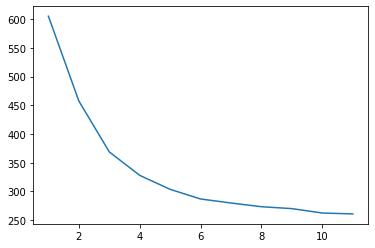

In [33]:
print(cost_list)

k_list = [1,2,3,4,5,6,7,8,9,10,11]
print(plt.plot(k_list, cost_list))

We computed clustering from __k=1 to k=11__ calculating also the sum of squared distance of each point from his center, to identify the _'elbow'_ in this graph. <br> __This value of k shoul be the best value for custering this datas__ <br> We noticed that is not so clear which k is the best choise so we take in exam values from k =2 to k = 4:
__In particular we take the best result of each K clustering (chosing the lowest value of squared dist)__ <br>
__Then for each cluster we look at correlation of all variables of the vectors and in this way we choose the best result__

#  K = 2

In [13]:
results2 = []
costs2 = []
for k in range(10):
    Clusters2 = random.choices(v_list, k = 2) #two clusters, don't work with an assignement of k outside the line
    res2 = clustering(2, Clusters2,v_list)
    totcosts2 = squareddist(res2)
    results2 +=[res2[0]]
    costs2.append(totcosts2)

Done In  13  steps
Done In  6  steps
Done In  8  steps
Done In  9  steps
Done In  8  steps
Done In  7  steps
Done In  10  steps
Done In  6  steps
Done In  3  steps
Done In  7  steps


In [14]:
print(costs2)
i = costs2.index(min(costs2))
optimal2 = results2[i]

c1 = optimal2[0]; c2 = optimal2[1]; 
df1 = pd.DataFrame(c1) ; Df1 = df1[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df2 = pd.DataFrame(c2) ; Df2 = df2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

[1371.8740344650573, 1371.7863632371423, 1371.786363237142, 1371.7863632371423, 1371.7863632371423, 1406.7848142830142, 1371.8740344650573, 1406.7848142830142, 1406.366257191797, 1371.7863632371423]


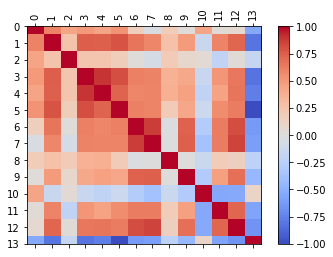

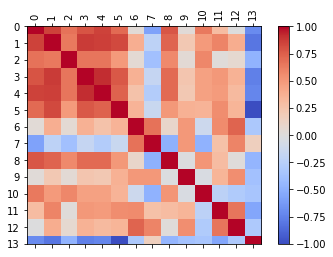

In [15]:
cor1 = Df1.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor1,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df1.columns)
ax.set_yticklabels(Df1.columns)
plt.show()

cor2 = Df2.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor2,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df2.columns)
ax.set_yticklabels(Df2.columns)
plt.show()

# K =  3

In [16]:
results3 = []
costs3 = []
for k in range(10):
    Clusters3 = random.choices(v_list, k = 3) #two clusters, don't work with an assignement of k outside the line
    res3 = clustering(3, Clusters3,v_list)
    totcosts3 = squareddist(res3)
    results3 +=[res3[0]]
    costs3.append(totcosts3)

Done In  6  steps
Done In  9  steps
Done In  11  steps
Done In  6  steps
Done In  11  steps
Done In  6  steps
Done In  9  steps
Done In  9  steps
Done In  9  steps
Done In  9  steps


In [19]:
print(costs3)
i = costs3.index(min(costs3))
print(costs3[i])
optimal3 = results3[i]

c3 = optimal3[0]; c2 = optimal3[1]; c3 = optimal3[2]
df1 = pd.DataFrame(c1) ; Df1 = df1[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df2 = pd.DataFrame(c2) ; Df2 = df2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df3 = pd.DataFrame(c3) ; Df3 = df3[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

[913.7916884354499, 914.0839237911672, 914.0839237911669, 913.5508894687196, 915.5062367398532, 913.5508894687197, 913.7916884354499, 913.79168843545, 913.7916884354503, 915.5062367398533]
913.5508894687196


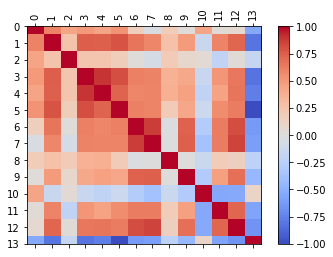

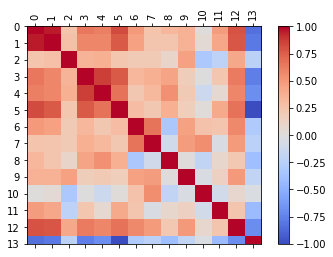

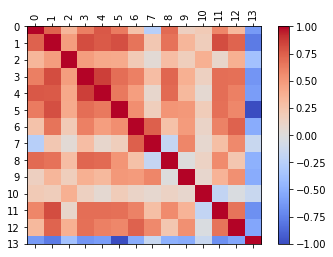

In [20]:
cor1 = Df1.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor1,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df1.columns)
ax.set_yticklabels(Df1.columns)
plt.show()

cor2 = Df2.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor2,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df2.columns)
ax.set_yticklabels(Df2.columns)
plt.show()

cor3 = Df3.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor3,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df3.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df3.columns)
ax.set_yticklabels(Df3.columns)
plt.show()

# K = 4 

In [23]:
results = []
costs = []
for k in range(10):
    Clusters4 = random.choices(v_list, k = 4) #two clusters, don't work with an assignement of k outside the line
    res4 = clustering(4, Clusters4,v_list)
    totcosts4 = squareddist(res4)
    results +=[res4[0]]
    costs.append(totcosts4)

Done In  6  steps
Done In  5  steps
Done In  17  steps
Done In  18  steps
Done In  7  steps
Done In  5  steps
Done In  6  steps
Done In  7  steps
Done In  10  steps
Done In  7  steps


In [24]:
i = costs.index(min(costs))
optimal4 = results[i]

c1 = optimal4[0]; c2 = optimal4[1]; c3 = optimal4[2]; c4 = optimal4[3]
df1 = pd.DataFrame(c1) ; Df1 = df1[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df2 = pd.DataFrame(c2) ; Df2 = df2[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df3 = pd.DataFrame(c3) ; Df3 = df3[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df4 = pd.DataFrame(c4) ; Df4 = df4[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]


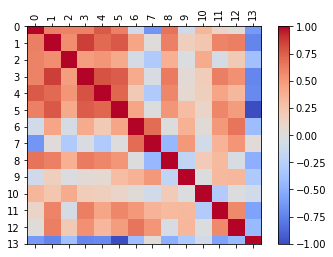

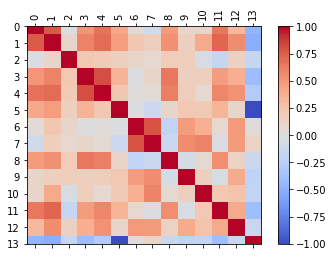

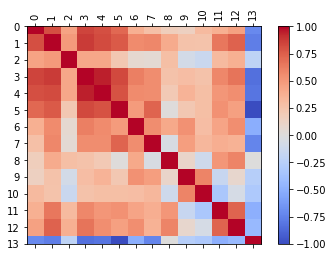

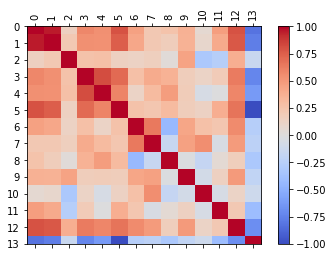

In [25]:
cor1 = Df1.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor1,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df1.columns)
ax.set_yticklabels(Df1.columns)
plt.show()

cor2 = Df2.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor2,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df2.columns)
ax.set_yticklabels(Df2.columns)
plt.show()

cor3 = Df3.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor3,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df3.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df3.columns)
ax.set_yticklabels(Df3.columns)
plt.show()

cor4 = Df4.corr() #Calculate the correlation of the above variables
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor4,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(Df4.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(Df4.columns)
ax.set_yticklabels(Df4.columns)
plt.show()


# Conclusions


Is not possible to visualize our dataset in the space, because we don't have the knoledge to visualize a N=14 dimension space. So  basically we try to do it indirectly. Especially to understand the quality of our clusters. <br> 
__We graph correlation for each cluster for each K of different computation of K means.__ <br>
__In conclusion__ The best clusters seems to be both k = 4 and k = 3 even if the plot suggests us that is for k = 3 that we indetify the _elbow_ in the graph. <br> (Even if, qualitatively, for K = 4 seems to be a bit better)